In [1]:
import jsonlines

corpus = "parsed_corpus.jsonl"
data = []
categories = []
with jsonlines.open(corpus) as reader:
    for obj in reader:
        data.append(obj['text'])
        categories.append(obj['category'])
corpus = data

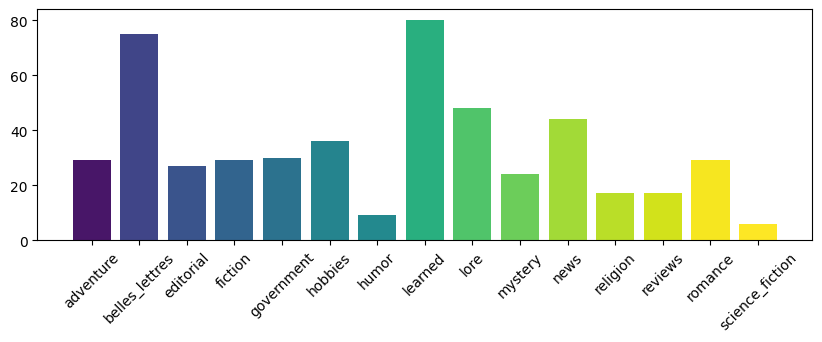

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 3))
plt.xticks(rotation=45)
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
plt.bar(categories, [categories.count(x) for x in categories], color=colors);

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_df=0.5, stop_words="english")
X = vectorizer.fit_transform(corpus)
X

<500x5510 sparse matrix of type '<class 'numpy.int64'>'
	with 198116 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

N_TOPICS = len(set(categories))
lda = LatentDirichletAllocation(
    n_components=N_TOPICS,
    doc_topic_prior=None,
    topic_word_prior=None,
    learning_method="batch",
    learning_decay=0.7,
    learning_offset=10.0,
    max_iter=10,
    batch_size=128,
    evaluate_every=-1,
    total_samples=1e6,
    perp_tol=0.1,
    mean_change_tol=0.001,
    max_doc_update_iter=100,
    n_jobs=-1,  # Use all available CPUs
    verbose=0,
    random_state=123,
)
lda.fit(X);

In [5]:
# Print the topics
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lda.components_):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for term in sorted_terms:
        print(term[0])
    print(" ")


Topic 0: 
church
form
negro
book
south
 
Topic 1: 
idea
experience
child
age
human
 
Topic 2: 
used
surface
rate
line
type
 
Topic 3: 
junior
bridge
stress
class
mr
 
Topic 4: 
war
american
john
music
west
 
Topic 5: 
president
committee
house
kennedy
party
 
Topic 6: 
eye
went
got
dont
thought
 
Topic 7: 
cost
business
church
clay
service
 
Topic 8: 
atom
form
patient
philosophy
bond
 
Topic 9: 
development
country
program
service
company
 
Topic 10: 
mr
court
school
united
tax
 
Topic 11: 
god
christ
pool
jesus
used
 
Topic 12: 
trial
car
seed
john
robert
 
Topic 13: 
area
feed
game
cattle
word
 
Topic 14: 
school
social
law
community
economic
 


In [6]:
def classify(doc):
    doc = vectorizer.transform([doc])
    topic = lda.transform(doc)
    topic_num = np.argmax(topic[0])
    terms_in_comp = zip(terms, lda.components_[topic_num])
    sorted_top_10 = sorted(terms_in_comp, key=lambda x:x[1], reverse=True)[:10]
    sorted_top_10 = [term[0] for term in sorted_top_10]
    print("Topic "+str(topic_num)+": ")
    print(sorted_top_10)

indices = np.arange(len(categories))
indices = np.random.permutation(indices)
corpus = [corpus[i] for i in indices]
categories = [categories[i] for i in indices]

random_docs = []
for i in range(10):
    random_docs.append({
        "label": categories[i],
        "doc": corpus[i]
    })

for doc in random_docs:
    cat = doc["label"]
    print("Category: " + cat)
    doc = doc["doc"]
    
    classify(doc)
    print("-"*40)

Category: learned
Topic 12: 
['trial', 'car', 'seed', 'john', 'robert', 'human', 'action', 'oil', 'food', 'evil']
----------------------------------------
Category: belles_lettres
Topic 6: 
['eye', 'went', 'got', 'dont', 'thought', 'didnt', 'away', 'knew', 'face', 'room']
----------------------------------------
Category: adventure
Topic 6: 
['eye', 'went', 'got', 'dont', 'thought', 'didnt', 'away', 'knew', 'face', 'room']
----------------------------------------
Category: learned
Topic 2: 
['used', 'surface', 'rate', 'line', 'type', 'number', 'result', 'material', 'increase', 'temperature']
----------------------------------------
Category: government
Topic 4: 
['war', 'american', 'john', 'music', 'west', 'soviet', 'york', 'united', 'country', 'military']
----------------------------------------
Category: romance
Topic 6: 
['eye', 'went', 'got', 'dont', 'thought', 'didnt', 'away', 'knew', 'face', 'room']
----------------------------------------
Category: editorial
Topic 6: 
['eye', 'w